## Carregando as bibiliotecas

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

## Carregando o arquivo

In [2]:
df_employee = pd.read_csv("Employee.csv", delimiter=",")

In [4]:
df_employee.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
df_employee.tail()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [7]:
df_employee.columns = ['qualificacao', 'ano_ingresso', 'cidade', 'nivel_pagamento', 'idade', 'genero',
       'ever_benched', 'experiencia_dominio_atual', 'sair_ou_nao']

In [9]:
df_employee.head()

,qualificacao,ano_ingresso,cidade,nivel_pagamento,idade,genero,ever_benched,experiencia_dominio_atual,sair_ou_nao
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [10]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   qualificacao               4653 non-null   object
 1   ano_ingresso               4653 non-null   int64 
 2   cidade                     4653 non-null   object
 3   nivel_pagamento            4653 non-null   int64 
 4   idade                      4653 non-null   int64 
 5   genero                     4653 non-null   object
 6   ever_benched               4653 non-null   object
 7   experiencia_dominio_atual  4653 non-null   int64 
 8   sair_ou_nao                4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


array([0, 1], dtype=int64)

## 1 - Qual é a distribuição das qualificações educacionais entre os funcionários?

Resposta: 
Bachelors    3601 |
Masters       873 |
PHD           179

In [46]:
df_employee['qualificacao'].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: qualificacao, dtype: int64

<Axes: title={'center': 'Distribuição das Qualificações educacionais entre os funcionários'}, ylabel='qualificacao'>

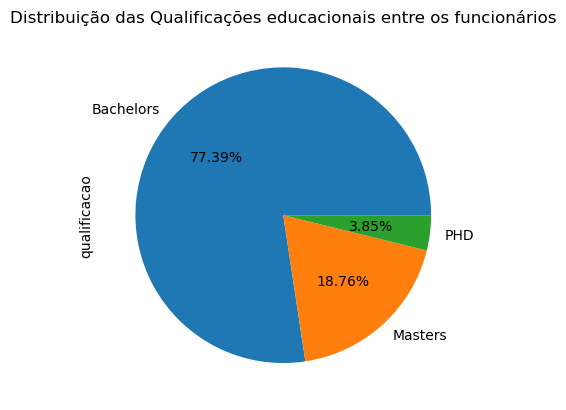

In [42]:
plt.title("Distribuição das Qualificações educacionais entre os funcionários")
df_employee['qualificacao'].value_counts().plot(kind="pie", autopct='%.2f%%')

## 2 - Como o tempo de serviço (ano de adesão) varia nas diferentes cidades?

Bangalore	8.140485 |
New Delhi	7.477960 |
Pune	7.998423


In [52]:
df_employee['ano_ingresso'].unique()

array([2017, 2013, 2014, 2016, 2015, 2012, 2018], dtype=int64)

In [60]:
hoje = dt.datetime.today()

In [64]:
ano = hoje.year

In [65]:
df_employee['tempo_servico'] = ano - df_employee['ano_ingresso']

In [67]:
df_employee.head()

,qualificacao,ano_ingresso,cidade,nivel_pagamento,idade,genero,ever_benched,experiencia_dominio_atual,sair_ou_nao,tempo_servico
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,6
1,Bachelors,2013,Pune,1,28,Female,No,3,1,10
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,9
3,Masters,2016,Bangalore,3,27,Male,No,5,1,7
4,Masters,2017,Pune,3,24,Male,Yes,2,1,6


In [68]:
df_employee['cidade'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [104]:
variacao_tempo_servico_cidade = df_employee.groupby("cidade").agg({
    'tempo_servico': np.mean
})

<BarContainer object of 3 artists>

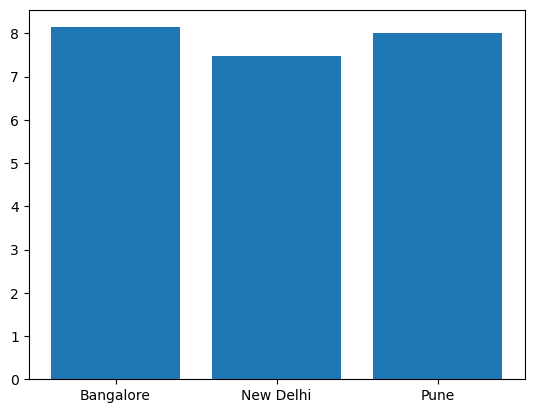

In [111]:
plt.bar(data=variacao_tempo_servico_cidade, height='tempo_servico', x=variacao_tempo_servico_cidade.index)

In [112]:
variacao_tempo_servico_cidade

,tempo_servico
cidade,
Bangalore,8.140485
New Delhi,7.477960
Pune,7.998423
